[link to dataset](https://zenodo.org/records/10000040)

# setup

In [1]:
!pip -q install saspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 13.1 MB/s eta 0:00:00


In [2]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}


Writing sascfg_personal.py


In [3]:
%%writefile /root/.authinfo
oda user djninalga@gmail.com password ^XvzWig32D8?t,9

Writing /root/.authinfo


# setup

In [4]:
import saspy
sas_session = saspy.SASsession()
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 2572



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/sascfg_personal.py
WORK Path             = /saswork/SAS_workE3D00000CE1B_odaws01-usw2.oda.sas.com/SAS_workC1580000CE1B_odaws01-usw2.oda.sas.com/
SAS Version           = 9.04.01M7P08062020
SASPy Version         = 5.4.4
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 52763


# read data

In [ ]:
c = sas_session.submitLST("""
PROC IMPORT DATAFILE="/home/u63687698/Data_Canada_complete.tsv"
    OUT=work.mydata
    DBMS=TAB REPLACE;
    DELIMITER='09'x;
    GETNAMES=YES;
RUN;
""")

In [11]:
c = sas_session.submitLST("""
PROC PRINT DATA=work.mydata(obs=10);
RUN;
""")

Obs,Date,Virus,Region,Positivity,Incidence,Incidence_pop,T_WAv,T_std_WAV,T_95_WAv,T_5_WAv,DifT_mean_WAv,DifT_95_WAv,DifT_5_WAv,RH_WAv,RH_std_WAV,RH_95_WAv,RH_5_WAv,DifRH_mean_WAv,DifRH_95_WAv,DifRH_5_WAv,AH_WAv,AH_std_WAV,AH_95_WAv,AH_5_WAv,DifAH_mean_WAv,DifAH_95_WAv,DifAH_5_WAv,T_95_abs,T_5_abs,RH_95_abs,RH_5_abs,AH_95_abs,AH_5_abs,RSV%.6
1,2013-08-31,ADENO,Canada,0.64,,0.0000187742,17.780298223,1.891531364,23.882000859,11.798186249,2.3408805084,1.6429048731,2.6790282943,80.657957002,6.6012208924,96.761780262,55.3257191,6.0271189404,1.9366892272,6.3620245728,12.339512836,1.6104376941,15.065539111,9.0146701701,2.4387513483,2.6555245671,1.487713854,32.63,-1,100,14.4675,20.418387551,3.0120746014,
2,2013-09-07,ADENO,Canada,1.57,,0.0000405848,15.327785792,2.7509810531,22.252985256,8.2197980573,-2.4360922,-1.620549816,-3.557725195,76.543280806,9.4218957142,96.506903656,47.079234751,-4.159945791,-0.297494548,-8.287874501,10.038627055,2.1802735382,13.883096984,6.4597250998,-2.301103521,-1.181911957,-2.553851066,33.3,-1,100,15.2305,19.339377967,1.7409018537,
3,2013-09-14,ADENO,Canada,1.73,,0.0000539734,14.469638763,2.9203203748,21.997811039,7.2522766844,-0.889865348,-0.266724167,-1.02012312,77.812071812,9.0347941245,96.686073456,50.040659834,1.1746866937,0.1667939842,2.8313293844,9.8199788617,2.3065405869,13.678186137,6.2822847252,-0.249694961,-0.21883098,-0.219995755,32,-2,100,18.196,20.872074985,2.633441114,
4,2013-09-21,ADENO,Canada,1.2,,0.0000460928,12.128534023,3.3202061756,19.730809246,4.4825729619,-2.357342879,-2.28459398,-2.780686833,77.774767765,8.7165453525,96.97117593,49.359465488,0.0525588631,0.3568346508,-0.659970722,8.4810004767,2.068900568,12.389122779,5.4633646176,-1.335123872,-1.266357974,-0.83403356,30.2,-3.7,100,18.876,18.967331877,2.7637016735,
5,2013-09-28,ADENO,Canada,0.97,,0.0000404549,10.890297184,2.701524666,18.36347726,4.2182187276,-1.236931186,-1.35975605,-0.269423855,77.620649432,7.1130890438,96.201038422,51.18261115,-0.120174799,-0.763380708,1.8707950018,7.7263756506,1.3355259831,10.427043988,5.5613555956,-0.7492352,-1.958608362,0.1059835781,24.175,-5.275,100,20.096,16.245045336,2.0246642165,
6,2013-10-05,ADENO,Canada,1.21,,0.0000541577,11.083545849,2.6792555134,17.474011774,4.8160563895,0.1956992117,-0.886079352,0.6017838902,77.461986402,8.8078776704,96.348321239,49.875808544,-0.212171856,0.1043840916,-1.35408144,7.9539966845,1.3369871586,10.442812904,5.5163604885,0.2228601998,0.0050184799,-0.046475701,27.9,-7,100,12.26,16.568832025,1.260304588,
7,2013-10-12,ADENO,Canada,1.61,,0.0000758011,9.4166179131,2.582978279,16.423508147,2.8658074885,-1.645439048,-1.043655209,-1.925083332,77.72887058,7.9457044913,96.557186623,50.504862618,0.3156848807,0.2528654546,0.6894942752,7.1378823421,1.341593904,10.255503048,5.076041371,-0.797532552,-0.171928747,-0.424228261,23.4,-7,100,22.25,16.942358048,2.0183575487,
8,2013-10-19,ADENO,Canada,1.75,,0.0000755382,7.9301938066,2.2855386858,13.491527754,2.1761226061,-1.559215738,-3.010410879,-0.742508808,80.39295551,7.0426244309,96.434917776,55.283929223,2.5936702895,-0.144651845,4.7573053507,6.8145776945,1.0763840582,9.1087108921,4.9813239988,-0.362905724,-1.182359972,-0.124088362,20,-7.865,100,22.497,15.305839539,2.4655971487,
9,2013-10-26,ADENO,Canada,2.47,,0.0001187597,4.5780754361,2.0468592022,9.7335609436,0.023144573,-3.370864971,-3.78733035,-2.173566443,81.373888564,6.2121442578,96.090635561,60.445989369,0.9900418391,-0.346199048,5.2059463519,5.4352743309,0.8528633369,7.2748480612,4.0261651336,-1.387179674,-1.851656692,-0.960492729,19.2,-10,100,23.533,12.8268138,1.805097483,
10,2013-11-02,ADENO,Canada,2.17,,0.0001240302,2.7324053895,3.6016783562,10.0260934,-3.594886925,-1.862896697,0.2837195619,-3.641566906,79.393891662,9.6217621271,96.645674496,55.930199884,-1.964566744,0.5663736332,-4.517419059,4.9341411995,1.5737944596,8.2462403858,2.9432671729,-0.509504812,0.9635230222,-1.092437669,19.125,-18,100,24.7675,13.581167563,0.882765139,


## clean datasets

In [ ]:
sas_session.submitLST("""
DATA work.clean;
    SET work.mydata;

    /* Create a new variable for the month */
    month = MONTH(date);

    /* Data Transform */
    Log_Incidence = log(Incidence_pop);

    /* Create a new variable for sub-zero temp */
    freezing = .;
    IF (T_WAv > 0) THEN freezing = 0;
    ELSE freezing = 1;
RUN;
""")

sas_session.submitLST("""
PROC SORT DATA=work.clean OUT=work.clean_sorted;
    BY month;
RUN;
""")


# The incidence rate of respiratory viruses is centered around the holidays




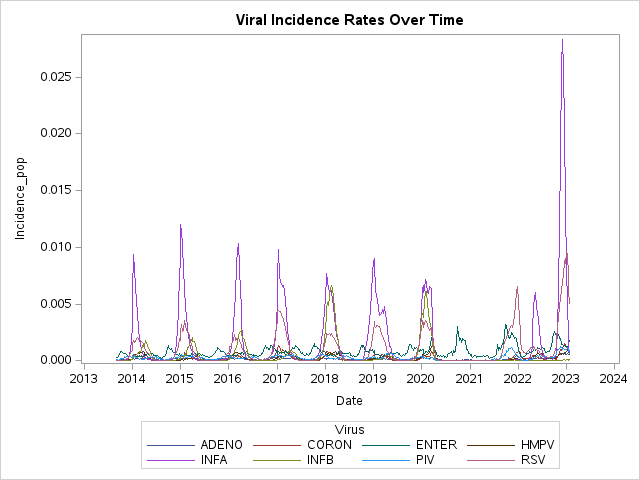

In [41]:
sas_session.submitLST("""
TITLE 'Viral Incidence Rates Over Time';
PROC SGPLOT DATA=work.mydata;
    SERIES x=date y=Incidence_pop / GROUP=Virus;
RUN;
QUIT
""")


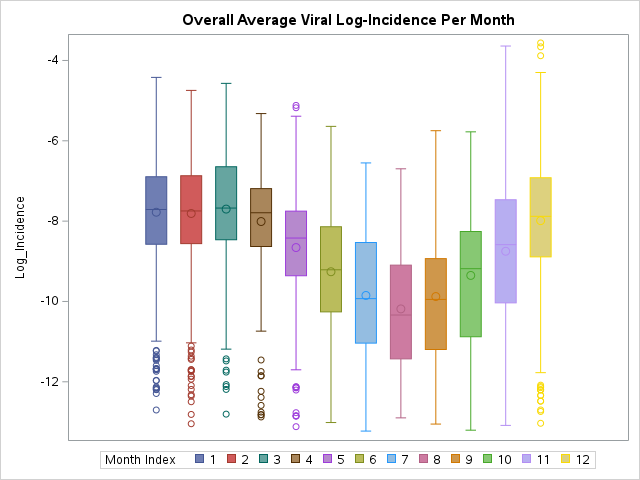

In [13]:
sas_session.submitLST("""
proc sgplot data=work.clean_sorted;
   vbox Log_Incidence / group=month;
   keylegend / title="Month Index";
   title "Overall Average Viral Log-Incidence Per Month";
run;
""")

# There is a negative linear relationship between temperature and Log-Incidence rates for each virus, with the exception of Entero Rhinovirus (ENTER)

In [ ]:
sas_session.submitLST("""
SYMBOL1 V=plus   C=black   I=r;
SYMBOL2 V=plus   C=blue   I=r;
SYMBOL3 V=plus   C=purple   I=r;
SYMBOL4 V=plus   C=pink   I=r;
SYMBOL5 V=plus   C=orange   I=r;
SYMBOL6 V=plus   C=red   I=r;
SYMBOL7 V=plus   C=green   I=r;
SYMBOL8 V=plus   C=grey   I=r;

TITLE 'Viral Incidence Rates vs Temperature';
PROC GPLOT DATA=work.clean;
    PLOT Log_Incidence*T_WAv=Virus;
RUN;
QUIT
""")

In [ ]:
sas_session.submitLST("""
TITLE 'Viral Incidence Rates vs Temperature per Virus';
proc reg data=work.clean;
   BY Virus;
   model Log_Incidence = T_WAv;
run;
""")

## Two-thirds of all respiratory viral illnesses occur in sub-zero temperatures.

freezing,Frequency,Percent
0,15512,65.82
1,8056,34.18

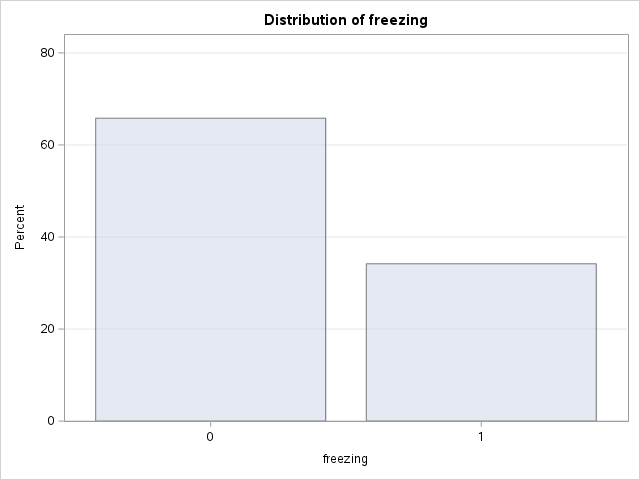

In [ ]:
sas_session.submitLST("""
PROC FREQ DATA=work.clean;
tables freezing/ nocum plots=freqplot(type=bar scale=percent);
run;
RUN;
""")

# There is a negative linear relationship between humidity and Log-Incidence rates for each virus, with the exception of Entero Rhinovirus (ENTER)

In [ ]:
sas_session.submitLST("""
SYMBOL1 V=plus   C=black   I=r;
SYMBOL2 V=plus   C=blue   I=r;
SYMBOL3 V=plus   C=purple   I=r;
SYMBOL4 V=plus   C=pink   I=r;
SYMBOL5 V=plus   C=orange   I=r;
SYMBOL6 V=plus   C=red   I=r;
SYMBOL7 V=plus   C=green   I=r;
SYMBOL8 V=plus   C=grey   I=r;

TITLE 'Viral Incidence Rates vs Absolute Humidity';
PROC GPLOT DATA=work.clean;
    PLOT Log_Incidence*AH_WAv=Virus;
RUN;
QUIT
""")

In [24]:
sas_session.submitLST("""
DATA work.negative;
    SET work.clean;
    IF freezing = 0 THEN DELETE;
RUN;
QUIT
""")


In [38]:

sas_session.submitLST("""
SYMBOL1 V=plus   C=black   I=r;
SYMBOL2 V=plus   C=blue   I=r;
SYMBOL3 V=plus   C=purple   I=r;
SYMBOL4 V=plus   C=pink   I=r;
SYMBOL5 V=plus   C=orange   I=r;
SYMBOL6 V=plus   C=red   I=r;
SYMBOL7 V=plus   C=green   I=r;
SYMBOL8 V=plus   C=grey   I=r;

TITLE 'Viral Incidence Rates vs Absolute Humidity';
PROC GPLOT DATA=work.clean;
    PLOT Log_Incidence*DifT_5_WAv=Virus;
RUN;
QUIT
""")